# 迴歸模型練習

In [15]:
from sklearn import linear_model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
X, y = make_regression(n_samples=200, n_features=1, noise=3, random_state=66)

Text(0.5, 1.0, 'Data Visualization')

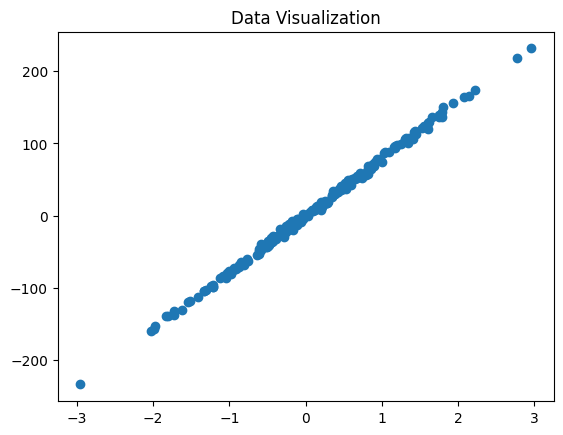

In [17]:
# 資料視覺化
plt.scatter(X, y)
plt.title('Data Visualization')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

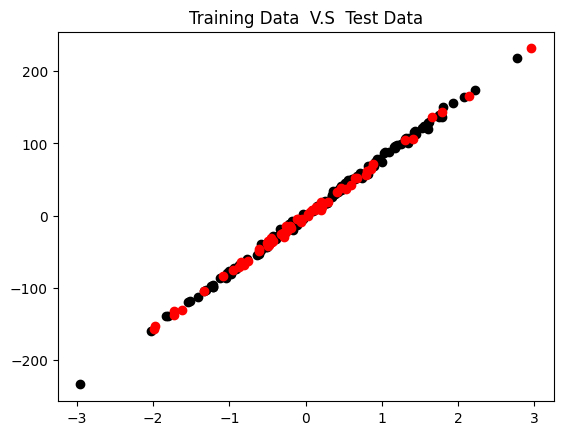

In [19]:
#黑點為訓練集資料，紅點為測試集資料
plt.scatter(X_train, y_train, color= 'black')
plt.scatter(X_test, y_test, color= 'red')
plt.title('Training Data  V.S  Test Data')
plt.show()

### 簡單線性迴歸

In [20]:
regr = linear_model.LinearRegression().fit(X_train, y_train)

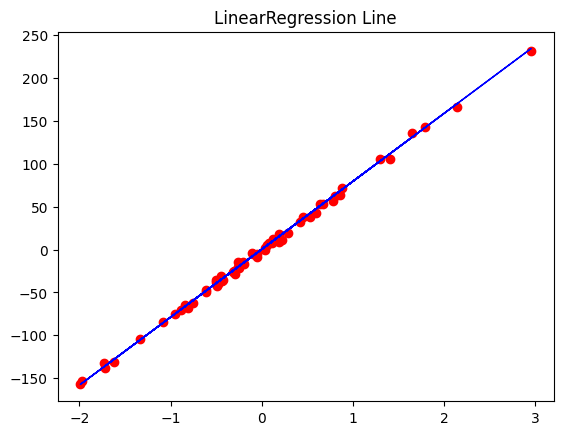

In [21]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test, regr.predict(X_test), color = 'blue', linewidth=1)
plt.title('LinearRegression Line')
plt.show()

### `regr.intercept_` 和 `regr.coef_` 使用

**`regr.intercept_` (截距)**
   - **定義**：表示當自變數（輸入特徵，通常記為 \( X \)）的值為 0 時，目標變數（輸出，通常記為 \( Y \)）的預測值。
   - **意義**：這是回歸線與 \( Y \)-軸的交點，代表基本的偏移量。

**`regr.coef_` (係數，或稱斜率)**
   - **定義**：表示每個自變數對目標變數的影響，即當自變數增加 1 單位時，目標變數的變化量。
   - **意義**：它描述了迴歸線的斜率，數值越大，影響越顯著。
   - **注意**：如果有多個自變數（多元迴歸），`regr.coef_` 會是一個陣列，表示每個特徵對 \( Y \) 的影響。

In [22]:
w_0 = regr.intercept_
w_1 = regr.coef_
print(f'截距 = {w_0}')
print(f'係數（斜率）= {w_1}')

截距 = 0.30712628134945064
係數（斜率）= [79.23650786]


---
### 1. 數值解釋：
- **截距（\( w_0 \)）= 0.30712628134945064**  
  當自變數（輸入特徵 \( X \)）的值為 0 時，目標變數（輸出 \( Y \)）的預測值為 **0.3071**（四捨五入到小數點後四位）。

- **斜率（\( w_1 \)）= [79.23650786]**  
  當自變數 \( X \) 增加 1 單位時，目標變數 \( Y \) 增加 **79.23650786** 單位。
### ２. 模型的迴歸公式：
\[
Y = 79.23650786．X + 0.3071
\]
### ３. 應用案例：
- 如果 \( X = 0 \)：  
  \[
  Y = 0.3071 （即截距）
  \]
- 如果 \( X = 1 \)：  
  \[
  Y = 79.23650786．1 + 0.3071 =  79.54360786
  \]
### ４. 結論：
- 此模型顯示 \( X \) 對 \( Y \) 有很大的影響，斜率 **79.23650786** 表示 \( X \) 每增加 1 單位，\( Y \) 會增長 79.23650786。
- 截距值相對較小，說明當 \( X = 0 \) 時，\( Y = 0.3071 \) 基礎值不大。

---

### R平方

In [23]:
train_R2 = regr.score(X_train, y_train)
print(f'Training data R平方 = {train_R2}')
print('\n')
print('訓練集資料，R平方，越高越好，表示準確程度越高')

Training data R平方 = 0.9985022529438589


訓練集資料，R平方，越高越好，表示準確程度越高


In [34]:
test_R2 = regr.score(X_test, y_test)
print(f'Test data R平方 = {test_R2}')
print('\n')
print('測試集資料，R平方，越高越好，表示準確程度越高')

Test data R平方 = 0.998094924977807


測試集資料，R平方，越高越好，表示準確程度越高


---
## Gradient Decent 梯度下降法

### 變數和設定的意義

1. **`alpha = 0.001`**
   - **學習率（Learning Rate）：**
     - 控制每次參數更新的步伐大小。
     - 學習率太小會導致收斂過慢，太大可能會導致不穩定或跳過最優解。

2. **`repeats = 100`**
   - **最大迭代次數：**
     - 梯度下降法的循環次數，表示更新參數的次數。
     - 目的是逐漸讓參數 \( w_0 \) 和 \( w_1 \) 收斂到損失函數的最小值。

3. **`w0 = 0` 和 `w1 = 0`**
   - **初始化參數：**
     - 梯度下降法需要從某個初始值開始，這裡將 \( w_0 \) 和 \( w_1 \) 都設為 0。
     - 初始值對收斂速度可能有影響，但在凸問題中最終結果不會改變。

4. **`error = []`**
   - **誤差列表：**
     - 用於記錄每次迭代的損失函數值（誤差），方便分析收斂過程。
     - 常見損失函數包括均方誤差（MSE）。

5. **`point = []`**
   - **參數記錄：**
     - 用於記錄每次迭代時的參數值 \( (w_0, w_1) \)。
     - 方便可視化參數的變化過程，觀察梯度下降的軌跡。

In [37]:
alpha = 0.001 #learning rate 學習率
repeats = 10000 #迭代次數(梯度下降法的循環次數)

# Initializing variables 初始化參數
w0 = 0  
w1 = 0  
errors = [] #用於記錄每次迭代的損失函數值（誤差）
points = [] #用於記錄每次迭代時的參數值

In [38]:
for j in range(repeats):
    error_sum = 0
    squared_error_sum = 0
    error_sum_x = 0
    for i in range(len(X_train)):
        predict = w0 + (X_train[i] * w1)
        squared_error_sum = squared_error_sum + (y_train[i] - predict) ** 2
        error_sum = error_sum + (y_train[i] - predict)
        error_sum_x = error_sum_x + (y_train[i] - predict) * X_train[i]
    w0 = w0 + (alpha * error_sum)
    w1 = w1 + (alpha * error_sum_x)
    errors.append(squared_error_sum / len(X_train))

print('w0: %2f' % w0)
print('w1: %2f' % w1)

w0: 0.307126
w1: 79.236508


/var/folders/2k/sw8w3mj923v232q1s3ltrpjm0000gn/T/ipykernel_27005/2969938528.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w0: %2f' % w0)
/var/folders/2k/sw8w3mj923v232q1s3ltrpjm0000gn/T/ipykernel_27005/2969938528.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w1: %2f' % w1)


In [39]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
    predict = w0 + (X_test[i] * w1)
    predicts.append(predict)

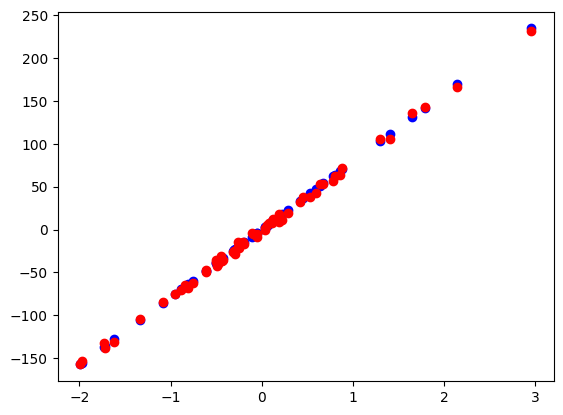

In [40]:
plt.scatter(X_test, predicts, color ='blue')
plt.scatter(X_test, y_test, color='red')
plt.show()

--- 

## Polynomial Regression

In [41]:
# size = [5,10,12,13,14,82,69,37,53,84,46,89,90,53,25,8,5,33,76,99,123,543,754,233,554,2,54,444,34,24,244,3,55,46,33,778,989,233,122,55,468,896,906,578,689,670,57,533,667,778,65,333,678,654,333,222,399]

import random
# 設定隨機種子
random.seed(42)

# 產生 50 個 1 到 1000 之間的隨機數字
random_numbers = [random.randint(1, 1000) for _ in range(50)]

# 顯示隨機數字
print(random_numbers)

[655, 115, 26, 760, 282, 251, 229, 143, 755, 105, 693, 759, 914, 559, 90, 605, 433, 33, 31, 96, 224, 239, 518, 617, 28, 575, 204, 734, 666, 719, 559, 430, 226, 460, 604, 285, 829, 891, 7, 778, 826, 164, 715, 433, 349, 285, 160, 221, 981, 782]
